# MSDS 422 Assignment 1

The dependent variable of interest is house prices in Ames, Iowa (‘SalePrice’)

## Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.shape

(1460, 81)

In [8]:
#no need for ID (arbitrary number)
train = train.drop(labels = 'Id',axis=1)

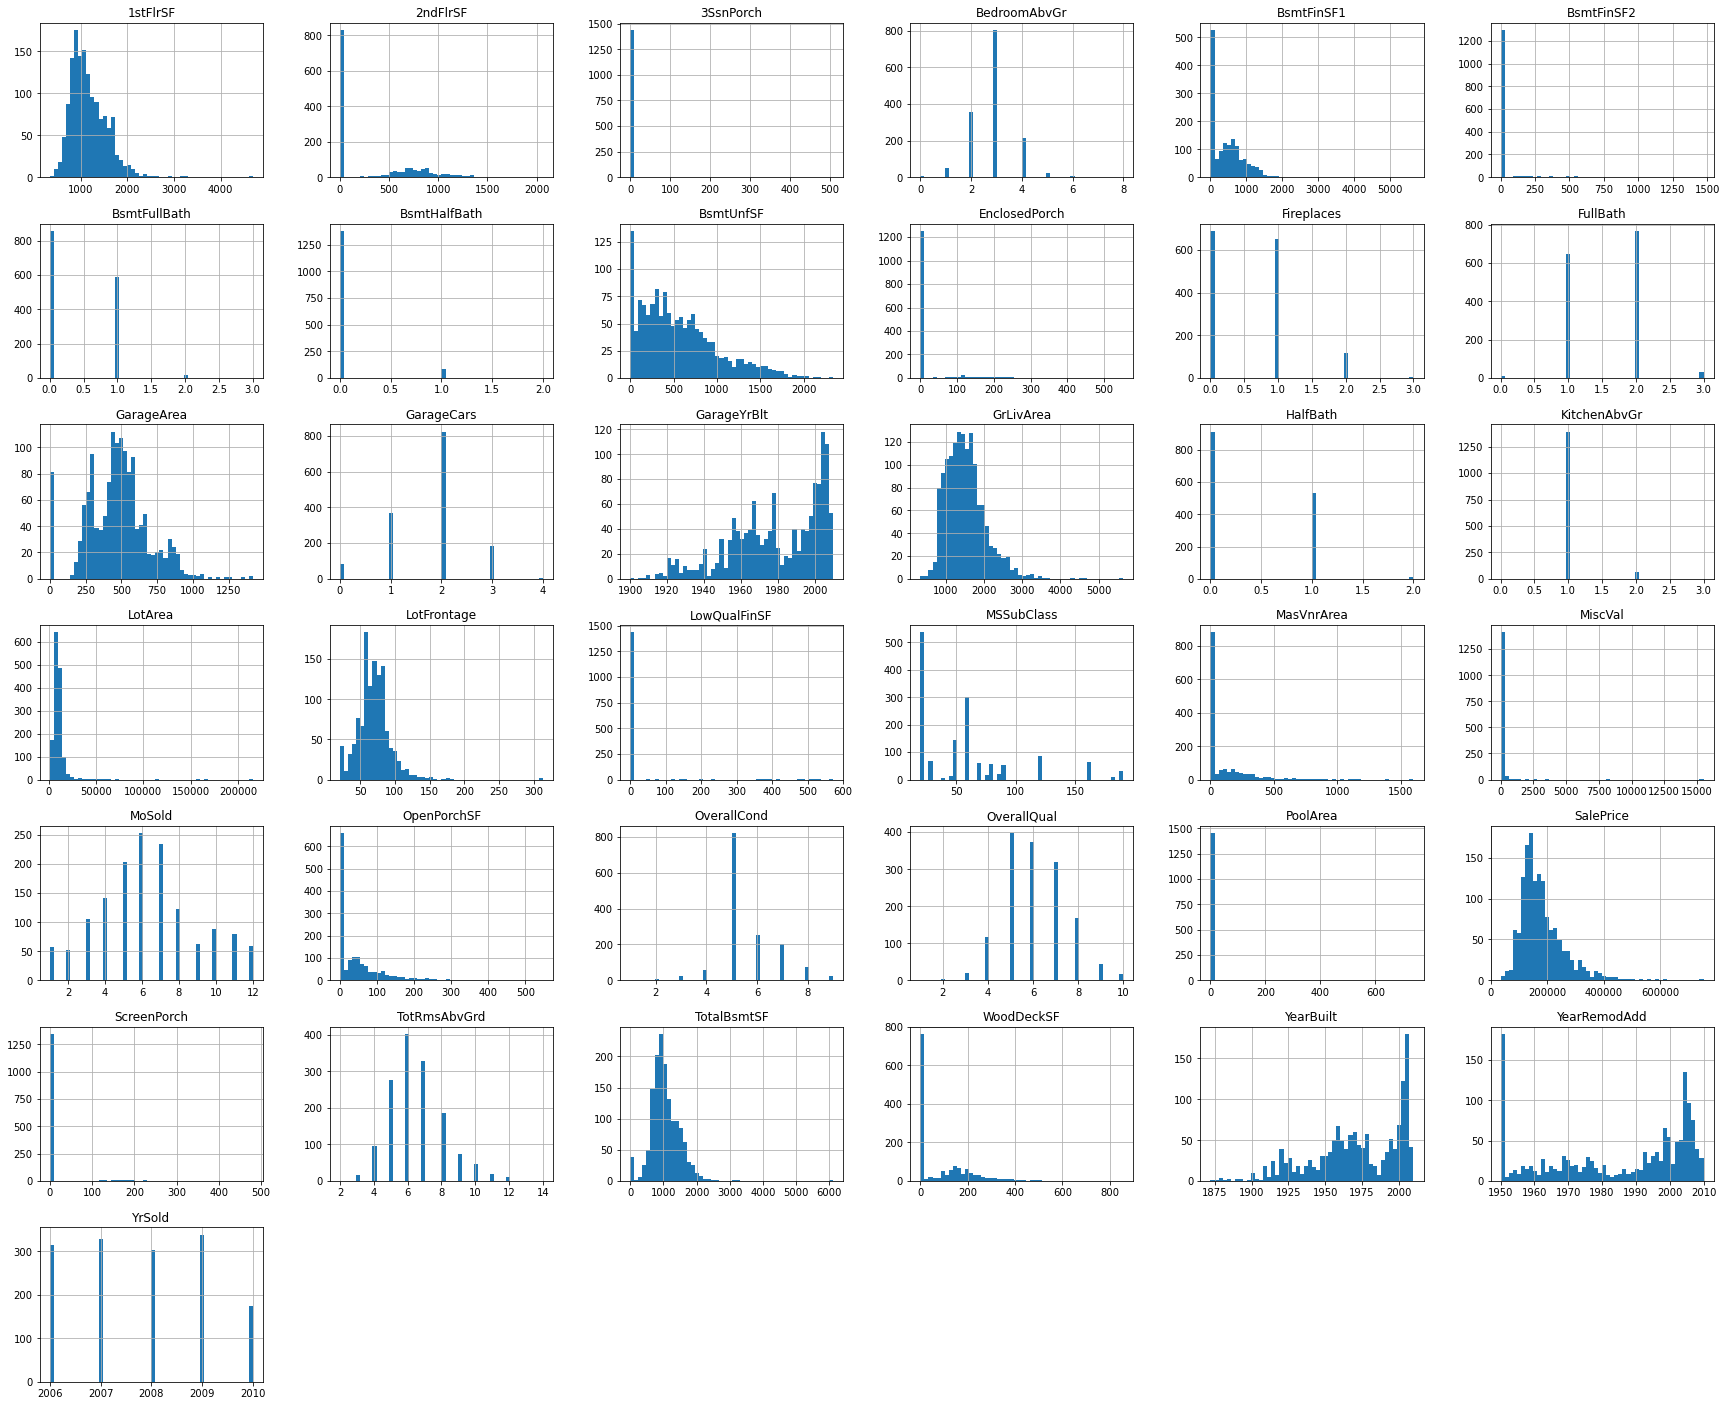

In [9]:
#distributions
train.hist(bins=50, figsize=(30,25))
plt.show()

#### 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [10]:
#code
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sale price from this data set is 180,921. Sale prices range from 129,975 to 755,000 with a median value of 163,000.

Text(0.5, 1.0, 'Histogram of Sale Prices')

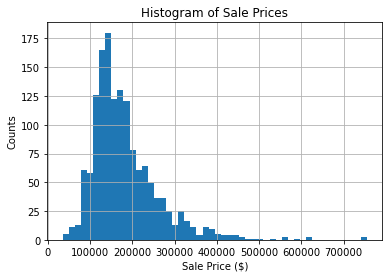

In [11]:
fig, ax = plt.subplots()
train["SalePrice"].hist(bins=50)
plt.xlabel('Sale Price ($)')
plt.ylabel('Counts')
plt.title('Histogram of Sale Prices')

NameError: name 'train' is not defined

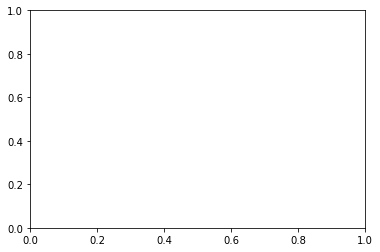

In [2]:
fig, ax = plt.subplots()
plt.boxplot(train["SalePrice"], vert=False)
plt.xlabel('Sale Price ($)')
plt.title('Boxplot of Sale Prices')

#high end of boxplot
214000 + 1.5*(214000 - 129975)

The histogram and boxplot above show that SalePrice is skewed to the right. Outliers may range from any SalePrice greater than ~340,000

#### 2. Investigate missing data and outliers.

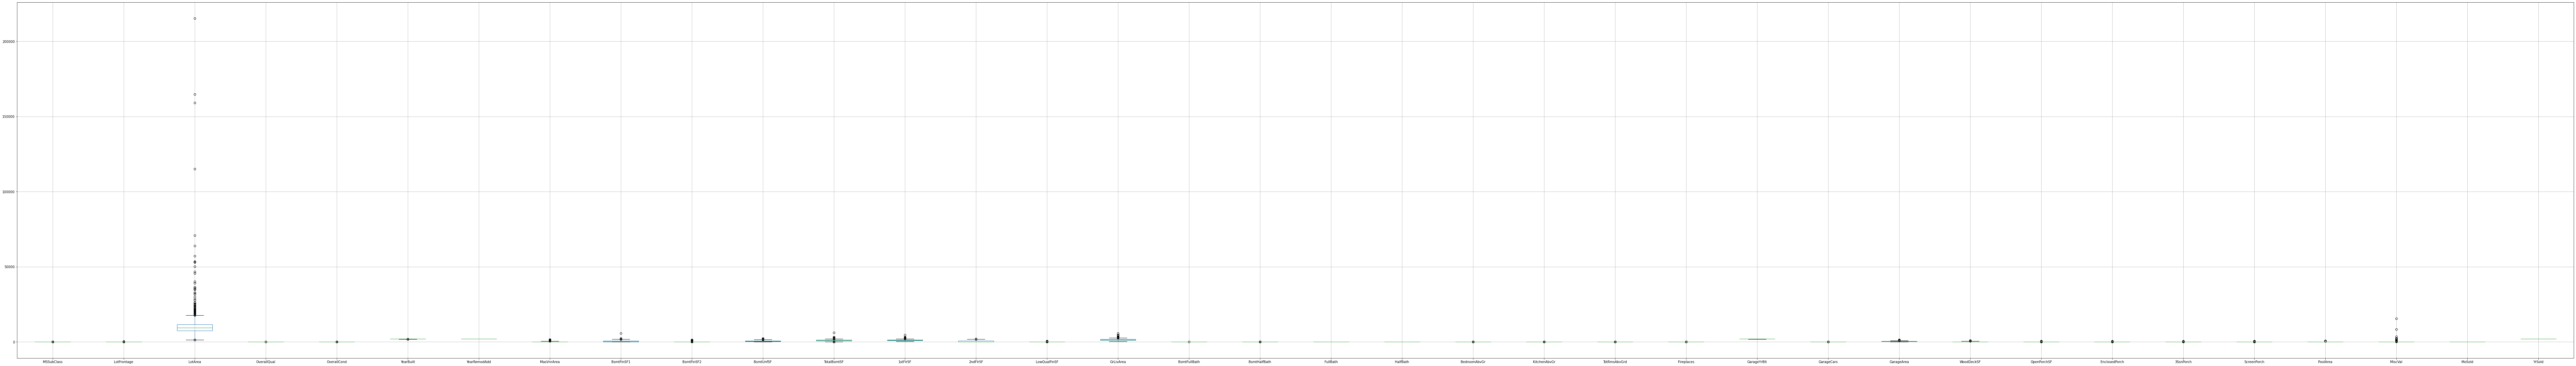

In [13]:
#outliers
plt.figure(figsize = (140,20))
train.loc[:, train.columns!='SalePrice'].boxplot()

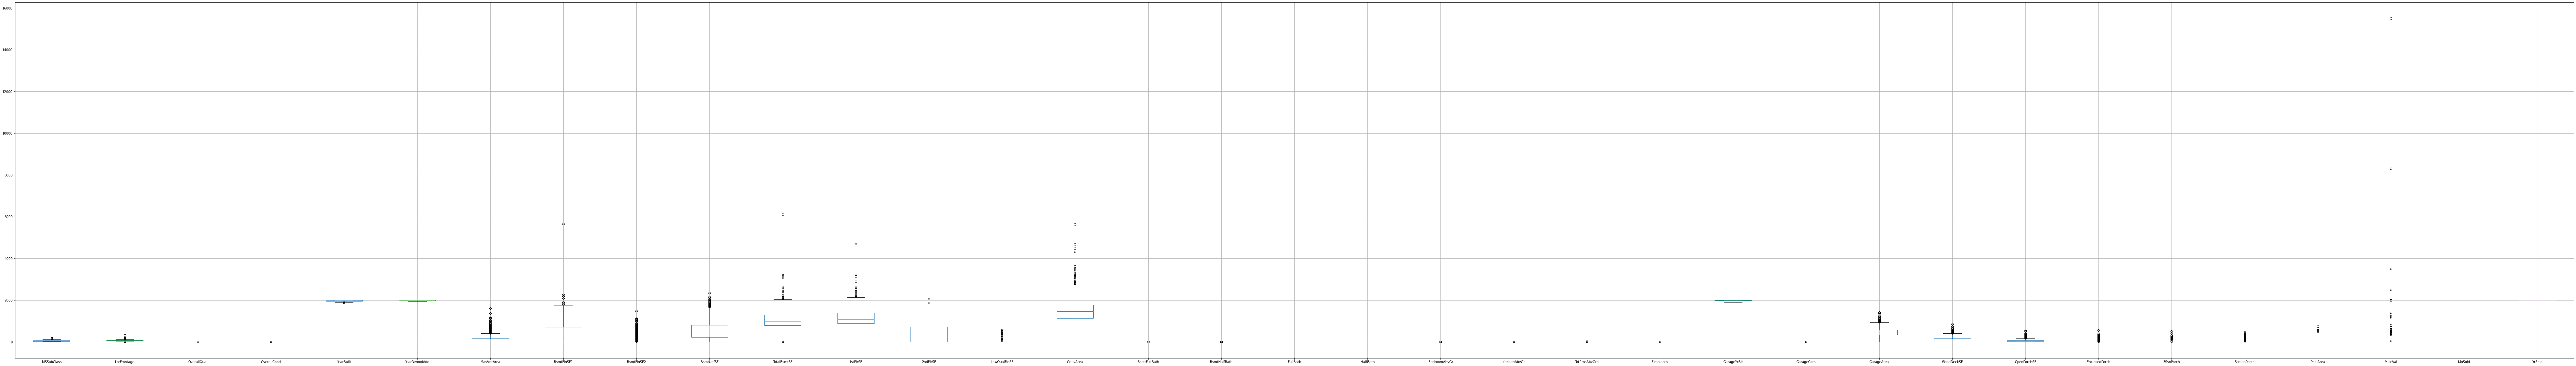

In [14]:
#outliers
plt.figure(figsize = (140,20))
train.loc[:, ~train.columns.isin(['SalePrice', 'LotArea'])].boxplot()

SalePrice and LotArea have values with magnitudes greater than other independent variables. When looking at other variables, many of their boxplots indicate several outliers.

In [15]:
#missing data
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

The variables above have numerous outliers. Of which, Alley, PoolQC, Fence, and MiscFeature have over 1000 null values relative to the 1460 total records.

In [16]:
#dupes
train.duplicated().sum()

0

There are no duplicate rows in the dataset.

#### 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

In [17]:
#correlation matrix
train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26


In [18]:
#highest correlations with SalePrice
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

The top 3 variables with the highest correlation with SalePrice are OverallQual (0.790982), GrLivArea (0.708624) and GarageCars (0.640409). All 3 have a positive correlation.

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from scipy import stats

RMSE: 0.8458826841860243


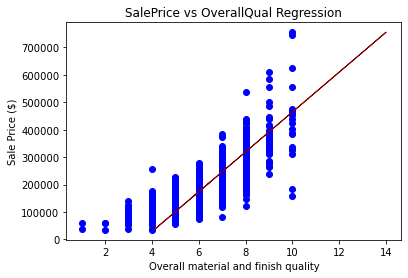

In [20]:
lm_oq = linear_model.LinearRegression()
lm_oq.fit(train[['SalePrice']], train['OverallQual'])
x_oq = lm_oq.predict(train[['SalePrice']])
rmse_oq = mean_squared_error(train['OverallQual'], x_oq, squared=False)

plt.scatter(train['OverallQual'], train['SalePrice'],  color='blue')
plt.plot(x_oq, train['SalePrice'], color='maroon', linewidth=1)
plt.ylabel('Sale Price ($)')
plt.xlabel('Overall material and finish quality')
plt.title('SalePrice vs OverallQual Regression')

print("RMSE:", rmse_oq)

RMSE: 370.6445090657199


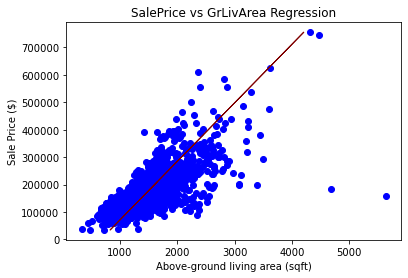

In [21]:
lm_gla = linear_model.LinearRegression()
lm_gla.fit(train[['SalePrice']], train['GrLivArea'])
x_gla = lm_gla.predict(train[['SalePrice']])
rmse_gla = mean_squared_error(train['GrLivArea'], x_gla, squared=False)

plt.scatter(train['GrLivArea'], train['SalePrice'],  color='blue')
plt.plot(x_gla, train['SalePrice'], color='maroon', linewidth=1)
plt.ylabel('Sale Price ($)')
plt.xlabel('Above-ground living area (sqft)')
plt.title('SalePrice vs GrLivArea Regression')

print("RMSE:", rmse_gla)

RMSE: 0.573766659729406


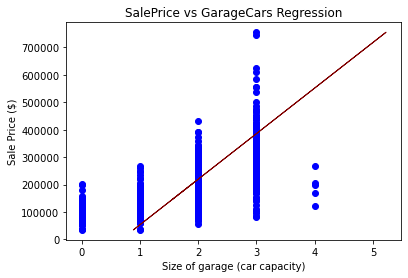

In [22]:
lm_gc = linear_model.LinearRegression()
lm_gc.fit(train[['SalePrice']], train['GarageCars'])
x_gc = lm_gc.predict(train[['SalePrice']])
rmse_gc = mean_squared_error(train['GarageCars'], x_gc, squared=False)

plt.scatter(train['GarageCars'], train['SalePrice'],  color='blue')
plt.plot(x_gc, train['SalePrice'], color='maroon', linewidth=1)
plt.ylabel('Sale Price ($)')
plt.xlabel('Size of garage (car capacity)')
plt.title('SalePrice vs GarageCars Regression')

print("RMSE:", rmse_gc)

The best predictors based on RMSE from lowest to highest are GarageCars (0.57), OverallQual (0.84), GrLivArea (370.64). GarageCars has the lowest RMSE which makes it the best predictor of the 3 tested above.

#### 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

In [23]:
#Average Overall Condition and Quality
train['OverallCondQual'] = (train['OverallCond'] + train['OverallQual'])/2

This predictor may remove the need to include both Condition and Quality into a model if they are highly correlated.

In [24]:
# Combine total finished basement sq ft with above ground
train['total_FinSqft'] = train['TotalBsmtSF'] + train['GrLivArea']

This predictor may remove the need to include both above and below square footage if they are highly correlated.

In [25]:
# Years to sell since last remodel
train['YearsToSell'] = train['YrSold'] - train['YearRemodAdd']

This predictor may provide insight on how long it took to sell a property since its last remodel.

In [26]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallCondQual,total_FinSqft,YearsToSell
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,6.0,2566,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,7.0,2524,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,6.0,2706,6
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000,6.0,2473,36
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000,6.5,3343,8


#### 5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [27]:
#min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_minmax = train.copy()

numeric_cols = train_minmax._get_numeric_data().columns 
train_minmax[numeric_cols] = scaler.fit_transform(train_minmax[numeric_cols])
train_minmax[numeric_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,OverallCondQual,total_FinSqft,YearsToSell
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078,0.588235,0.195481,0.098361
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583,0.705882,0.191802,0.524590
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908,0.588235,0.207742,0.114754
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952,0.588235,0.187336,0.606557
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709,0.647059,0.263531,0.147541


In [28]:
#standard scaling
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
std_scaler = StandardScaler()
train_std = train.copy()

numeric_cols = train_std._get_numeric_data().columns 
train_std[numeric_cols] = std_scaler.fit_transform(train_minmax[numeric_cols])
train_std[numeric_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,OverallCondQual,total_FinSqft,YearsToSell
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,0.192175,-0.008372,-0.869941
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,1.373547,-0.059386,0.390141
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.192175,0.161672,-0.821476
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,0.192175,-0.121330,0.632464
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,0.782861,0.935372,-0.724547


When using machine learning, models are typically used to tell the distance between data. By scaling using either min-max or standard, we can normalize and/or standardize the data before going into certain analyses or algorithms that require it.